### STEP BY STEP
##### 1.Getting the data ready
##### 2.Choose the right estimator/algorithm for our problems
##### 3.Fit the model/algorithm and use it to make predictions on our data
##### 4.Evaluating a model
##### 5.Improve a model
##### 6.Save and load a trained model
##### 7.Putting it all together

### 0.An end-to-end scikit learn workflow

# SCROLL DOWN

# SCROLL DOWN

# FIND THE MISSING VALUES
# 1.Getting our data ready to used with machine learning
## Three main things we have to do
    1.split the data into features and labels (usually 'X' & 'Y')
    2.Filling (also called imputing) or disregarding missing values
    3.Converting non-numerical values to numerical value (also called feature encoding)

In [1]:
#import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### 1.1 Make sure its all numerical/And split X & y

In [2]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [4]:
#Split to X/Y
X = car_sales.drop("Price",axis = 1)
y = car_sales["Price"]

#Split into training and test
X_train,X_train,Y_train,Y_train = train_test_split(X,y,test_size=0.2)

In [5]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train,Y_train) <--- it will error
# model.score(X_test,Y_test) <--- it will error

In [6]:
#Turn the categories into numbers
categorical_features = ["Make", "Colour", "Doors"]

#Buat encoder dan transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)
    ],
    remainder="passthrough"
)

# Transformasi data (fit + transform)
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [7]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [8]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]],dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [9]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size = 0.2)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there was missing values?
#### 1.Fill them with some value(also know as imputation)
#### 2.Remove the sample with missing data altogether

In [11]:
#csm is car_sales_missing
csm = pd.read_csv("car-sales-extended-missing-data.csv")
csm.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [12]:
csm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
#Create X and Y
X = csm.drop("Price",axis = 1)
y = csm["Price"]

In [14]:
#lets try and convert to numbers
#Turn the categories into numbers
categorical_features = ["Make", "Colour", "Doors"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)
    ],
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

### 1.Fill missing data with pandas


In [15]:
#FILL MISSING MAKE,COLOUR,ODOMETER,AND DOORS Code
csm["Make"].fillna("missing" )

csm["Colour"].fillna("missing")

csm["Odometer (KM)"].fillna(csm["Odometer (KM)"].mean())

csm["Doors"].fillna(4)

0      4.0
1      5.0
2      4.0
3      4.0
4      3.0
      ... 
995    4.0
996    3.0
997    4.0
998    4.0
999    4.0
Name: Doors, Length: 1000, dtype: float64

In [16]:
csm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [17]:
csm.dropna(inplace = True)

In [18]:
csm.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [19]:
X = csm.drop("Price",axis = 1)
y = csm["Price"]


In [20]:
#lets try and convert to numbers
#Turn the categories into numbers
categorical_features = ["Make", "Colour", "Doors"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)
    ],
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(csm)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [21]:
print(csm.head())

     Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0


In [22]:
df = pd.read_csv("car-sales-extended-missing-data.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### 2.Fill missing values with Scikit-Learn

In [23]:
csm = pd.read_csv("car-sales-extended-missing-data.csv")
csm.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
#Drio the rows with no labels
csm.dropna(subset=["Price"],inplace = True)
csm.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [25]:
#SPlit into data X & y
X = csm.drop("Price",axis = 1)
y = csm["Price"]

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value = "missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define column
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Transform the data 
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features),
])

filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [27]:
#csf is car_sales_filled
csf = pd.DataFrame(filled_x,
                   columns=["Make","Colour","Doors","Odometer (KM)",])
csf

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [28]:
csf.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [29]:
#lets try and convert to numbers
#Turn the categories into numbers
categorical_features = ["Make", "Colour", "Doors"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)
    ],
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(csf)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [30]:
#Now we've got our data as numbers and filled(no missing values)
#Lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                 y,
                                                 test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2.Choosing the right estimator/algorithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category(heart diases or not)
* Sometimes you'll see clf(short for classfier) used as classification estimator
* regression problem - predicting a number(selling price of a car)

If you're working on machine learning problem and looking use SKlearn and not sure what model you should use,refer to sklearn machine learning map:https://scikit-learn.org/stable/machine_learning_map.html


### 2.1 picking a machine learning model for a regression problem
Lets use the california Housing dataset

In [31]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [32]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
# housing_df = housing_df.drop("MedHouseVal", axis = 1)
# housing_df

In [35]:
#Import algorithm/estimator
from sklearn.linear_model import Ridge
#Setup random seed
np.random.seed(42)

#create the data
X = housing_df.drop("target",axis = 1)
y = housing_df["target"]

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

#Intastiate and fit the model
model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5758549611440127

### USE ensemble methods https://scikit-learn.org/stable/modules/ensemble.html

In [36]:
#Import RandomForestRegressor class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)
#Create the data

X = housing_df.drop("target",axis = 1)
y = housing_df["target"]

#Split into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

#Create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)

#check the score
model.score(X_test,y_test)
print(model.score(X_test,y_test))

0.806652667101436


### 2.2 Choosing an estimator for a classfication problem

In [37]:
hd = pd.read_csv("heart-diseasee.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and says to try LinearSvc

In [38]:
#import the linear estimator
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#make the data
X = hd.drop("target",axis = 1)
y = hd["target"]

#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Intantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8688524590163934

In [39]:
hd["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [40]:
#import the linear estimator
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
X = hd.drop("target",axis = 1)
y = hd["target"]

#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Intantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

## 3.Fit the model/algorithm on our data and use it to make prediction


  ### 3.1 Fitting the model to the data
  diffrent names for:
  * 'X' = features,deatures variable,data
  * 'y' = lables,targets,targets variable

In [41]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
X = hd.drop("target",axis = 1)
y = hd["target"]

#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Intantiate LinearSVC and fit the data
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#check score
clf.score(X_test,y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model
2 wats to make predictions:
* predict()
* predict_proba()

In [42]:
#Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
#Compare predictions to trusth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [44]:
clf.score(X_test,y_test)

0.8524590163934426

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score = (X_test,y_test)

In [46]:
#predict_proba() returns probabilities of a cassification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [47]:
#Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### `predict()` can also used for regression models

In [48]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Making the data
X = housing_df.drop("target",axis = 1)
y = housing_df["target"]

#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#Create the model
model = RandomForestRegressor()

#Fit the model to the data 
model.fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)


In [50]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [51]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [52]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds) 

0.32656738464147306

In [53]:

## Tanggal: 22 Juli 2025
## Waktu: 20:59 WIB
## Alasan: Saya sedang mempelajari cara mengevaluasi model machine learning
##         dari dokumentasi Scikit-Learn, khususnya bagian .score(), scoring,
##         dan metric functions. Saya masih mencari tahu kapan sebaiknya
##         menggunakan ketiganya dan contoh implementasi nyatanya.
##         Kode ini akan dilanjutkan setelah saya memahami cara penggunaan metrik
##         seperti accuracy_score, mean_absolute_error, dan cross_val_score.

## 4.Evaluating a machine learning model

Theree ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()`method
2. The `scoring` parameters
3. Problem-specific metric functions

Read in: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 evaluating a model the `score` method

In [54]:
from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

#Create X & y 
X = hd.drop("target",axis = 1)
y = hd["target"]

#create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#Create classifier model instance
model = RandomForestClassifier()

#Fit classifier to training data
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
#The highest for the .score() method is 1.0, the lowest is 0,0
clf.score(X_train,y_train)

1.0

In [56]:
clf.score(X_test,y_test)

0.8524590163934426

### Let's use the `score()` on our regression problem...

In [57]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target",axis = 1)
y = housing_df["target"]
#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#Create the model
model = RandomForestRegressor(n_estimators = 50)

#Fit the model to the data 
model.fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)


In [58]:
model.score(X_train,y_train)

0.9724639427824666

In [59]:
model.score(X_test,y_test)

0.8040980559742771

In [60]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **4.2 Evaluating a modek using scoring parameter**

In [61]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
np.random.seed(42)

#Create X & y 
X = hd.drop("target",axis = 1)
y = hd["target"]

#create train/test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#Create classifier model instance
clf = RandomForestClassifier(n_estimators=100)

#Fit classifier to training data
clf.fit(X_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
clf.score(X_train,y_train)

1.0

In [63]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [64]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test,y_test)

#Take mean of 5-fold cross-validaation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y, cv = 5))

#Compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [65]:
#Default scoring parameter of classifier = mean accuracy
clf.score(X_train,y_train)

1.0

In [66]:
#Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluating metrics

#### 1.accuracy
#### 2.Area untder ROC curve
#### 3.Confiusion matrix
#### 4.Classification report

In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

np.random.seed(42)
X = hd.drop("target",axis=1)
y = hd["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf,X,y,cv=5)


In [68]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [69]:
print(f"Heart diasease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}% ")

Heart diasease Classifier Cross-Validated Accuracy: 82.48% 


**AUC/ROC**

***True positive = model predicts 1 when truth is 1***

***False postive = model predicts 1 when truth is 0***

***True negative = model predicts 0  when truth is 0***

***False negative = model predicts 0 when truth is 1***

*w*

In [70]:
#Create X_test... etc
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)


In [71]:
from sklearn.metrics import roc_curve
#Fit
clf.fit(X_train,y_train)

#Make predict with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10] , len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [72]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [73]:
#Calculate fpr,tpr,and thresholds
fpr,tpr,threshold = roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

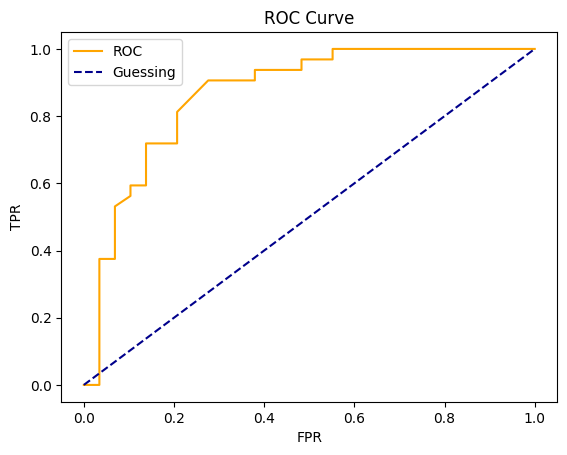

In [74]:
#Create a funcition for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    #PLot the ROC curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    #Plot line with no predictive power
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    #Costumize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

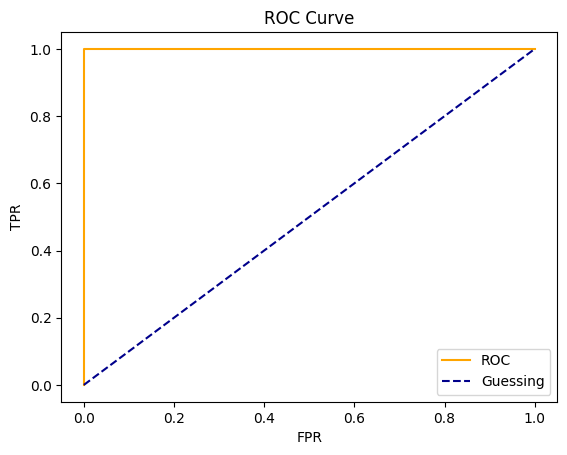

In [76]:
#PLot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [77]:
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

**CONFUSION MATRIX**

The next way to a classification model is by using a confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it supposed to predict

in essence, this gives you an idea of where the model is getting confused

In [78]:
#See here for sklearn confusion matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [79]:
#Visualize confusion matrix with pf.crosstab()
pd.crosstab(y_test,y_preds,
            rownames=["Actually Labels"],
            colnames=["Predicts Labels"])

Predicts Labels,0,1
Actually Labels,,
0,23,6
1,6,26


<Axes: >

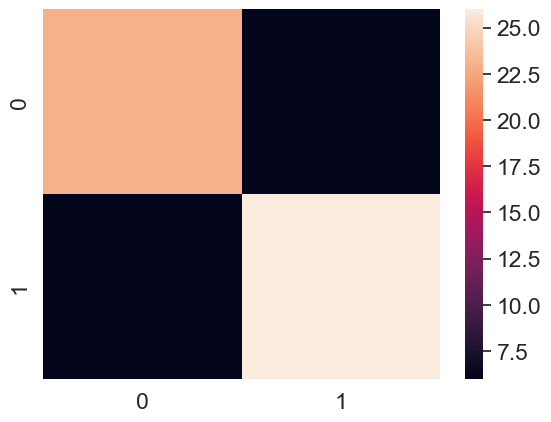

In [80]:
#Make our confusion matrix more visual with seaborn
import seaborn as sns

sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_mat)

**Classification Report**

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [82]:
#Where predicion and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]# onlt one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

,0.0,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0
support,10000.0,1.0,10000.0,10000.0


### 4.2.2 Regression model evaluation metrics

Model evaluationmetrics documentation https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:

 1.R^2(pronounced r-squared) or coefficient of determination 
 
 2.Mean absolute error(MAE) 
 
 3.Mean squared eror(MSE)

### **R² score** adalah metrik evaluasi yang digunakan dalam regresi.
#### Tujuannya: mengukur seberapa baik model dapat menjelaskan variasi data target (y_true).
#### Nilainya:

1.0 → prediksi sempurna (model menjelaskan 100% variasi data).

0.0 → model tidak lebih baik daripada hanya menebak mean dari data target.

< 0.0 → model lebih buruk daripada sekadar menebak mean.

In [101]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
model.score(X_test,y_test)

0.2836399999999999

In [103]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [104]:
y_test

293    0
80     1
277    0
282    0
280    0
43     1
159    1
204    0
116    1
32     1
Name: target, dtype: int64

In [105]:
y_test.mean()

np.float64(0.5)

In [106]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean= np.full(len(y_test) , y_test.mean())

In [107]:
y_test_mean[:10]

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [108]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [109]:
r2_score(y_true=y_test,
         y_pred = y_test)

1.0

## **Mean absolute error(MAE)**
#### MAE is the average od the absolute diffrences betwwen prediction and actual values

it gaves you an idea of how wrong you model predictions are.

In [112]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.3430000000000001

In [116]:
df = pd.DataFrame(data={"actual values":y_preds,
                 "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
0,0.76,0.76,0.0
1,0.79,0.79,0.0
2,0.79,0.79,0.0
3,0.35,0.35,0.0
4,0.51,0.51,0.0
5,0.80,0.80,0.0
6,0.82,0.82,0.0
7,0.18,0.18,0.0
8,0.76,0.76,0.0
9,0.99,0.99,0.0


In [118]:
#MAE using dormulas and differences
np.abs(df["differences"]).mean()

np.float64(0.0)

## **Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [119]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.17909000000000003

In [120]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
0,0.76,0.76,0.0,0.0
1,0.79,0.79,0.0,0.0
2,0.79,0.79,0.0,0.0
3,0.35,0.35,0.0,0.0
4,0.51,0.51,0.0,0.0


In [121]:
#Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

np.float64(0.0)

In [122]:
df.iloc[0]

actual values          0.76
predicted values       0.76
differences            0.00
squared_differences    0.00
Name: 0, dtype: float64

In [123]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_21264\3409892222.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [126]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
0,0.76,0.76,0.0,16.0
1,0.79,0.79,0.0,0.0
2,0.79,0.79,0.0,0.0
3,0.35,0.35,0.0,0.0
4,0.51,0.51,0.0,0.0


In [125]:
#Calculate MSE with large error
df_large_error["squared_differences"].mean()

np.float64(1.6)

In [127]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
0,0.76,0.76,0.0,16.0
1,20.00,20.00,20.0,20.0
2,20.00,20.00,20.0,20.0
3,20.00,20.00,20.0,20.0
4,20.00,20.00,20.0,20.0
5,20.00,20.00,20.0,20.0
6,20.00,20.00,20.0,20.0
7,20.00,20.00,20.0,20.0
8,20.00,20.00,20.0,20.0
9,20.00,20.00,20.0,20.0
